In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

# QUESTION 1 Rotate Crazy Hat

In [2]:
#Loading the crazy hat data
crazy_hat = pd.read_csv('crazy-hat.tsv', sep='\t')

In [3]:
#Checking the validity of the data
crazy_hat.head()

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye


In [4]:
#Checking the number of rows
len(crazy_hat)

15

_After loading the crazy hat data, I can see that there are x and y coordinates for 4 features of the hat namely left eye, right eye, outline and mouth._

In [5]:
#Making a grouped object based on group
grouped = crazy_hat.groupby('group')

In [6]:
#Iterating the group to make a dictionary of values
d = {}
for name, group in grouped:
    for row_index, row in group.iterrows():
        if(name not in d):
            d[name] = [[row['x'], row['y']]]
        else:
            d[name].append([row['x'], row['y']])

print(d)

#Making a temp matrix which would be used later to be copied
temp = copy.deepcopy(d)
print(temp)

{'leye': [[-3, 7], [-3, 14]], 'mouth': [[-11, -10], [-7, -17], [-3, -10], [2, -17], [6, -10], [10, -17], [12, -13]], 'outline': [[0, 22], [16, -18], [-16, -18], [0, 22]], 'reye': [[2, 7], [2, 14]]}
{'leye': [[-3, 7], [-3, 14]], 'mouth': [[-11, -10], [-7, -17], [-3, -10], [2, -17], [6, -10], [10, -17], [12, -13]], 'outline': [[0, 22], [16, -18], [-16, -18], [0, 22]], 'reye': [[2, 7], [2, 14]]}


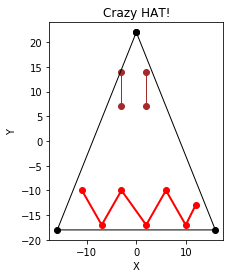

In [7]:
#Plotting the Hat without rotation
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.array(d['mouth'])[:,0], np.array(d['mouth'])[:,1],  marker='o', c='red', linewidth=2)
ax.plot(np.array(d['leye'])[:,0], np.array(d['leye'])[:,1],  marker='o', c='brown', linewidth=1)
ax.plot(np.array(d['reye'])[:,0], np.array(d['reye'])[:,1],  marker='o', c='brown', linewidth=1)
ax.plot(np.array(d['outline'])[:,0], np.array(d['outline'])[:,1],  marker='o', c='black', linewidth=1)
ax.set_title('Crazy HAT!')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plt.show()


_The image is successfully displayed_

__Q 1.3 Rotate the crazy hat 66 degrees__

In [9]:
#Making a rotation matrix
def sin_value(degree):
    return np.sin(degree * np.pi/180)

 

def cos_value(degree):
    return np.cos(degree * np.pi/180)

 
#66 DEGREE ROTATION
R_66 = np.array([[cos_value(-66), -sin_value(-66)], [sin_value(-66), cos_value(-66)]])
R_66

array([[ 0.40673664,  0.91354546],
       [-0.91354546,  0.40673664]])

In [10]:
#Rotating all the values of the values in D
rotated = {}
for key in d:
    rotated[key] = np.matmul(np.array(d[key]), R_66)
print(d)
print(rotated)

{'leye': [[-3, 7], [-3, 14]], 'mouth': [[-11, -10], [-7, -17], [-3, -10], [2, -17], [6, -10], [10, -17], [12, -13]], 'outline': [[0, 22], [16, -18], [-16, -18], [0, 22]], 'reye': [[2, 7], [2, 14]]}
{'leye': array([[ -7.61502813,   0.10652013],
       [-14.00984634,   2.95367663]]), 'mouth': array([[  4.6613515 , -14.11636646],
       [ 12.68311628, -13.30934114],
       [  7.91524465,  -6.8080028 ],
       [ 16.34374607,  -5.08743202],
       [ 11.57587443,   1.41390632],
       [ 19.59763921,   2.22093164],
       [ 16.75693067,   5.67496913]]), 'outline': array([[-20.09800007,   8.94820615],
       [ 22.95160453,   7.29546775],
       [  9.93603195, -21.9379869 ],
       [-20.09800007,   8.94820615]]), 'reye': array([[ -5.58134492,   4.67424742],
       [-11.97616312,   7.52140392]])}


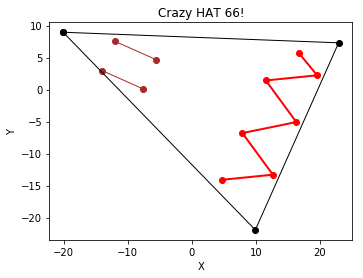

In [11]:
#Plotting the crazy hat with rotation
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.array(rotated['mouth'])[:,0], np.array(rotated['mouth'])[:,1],  marker='o', c='red',linewidth=2)
ax.plot(np.array(rotated['leye'])[:,0], np.array(rotated['leye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(rotated['reye'])[:,0], np.array(rotated['reye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(rotated['outline'])[:,0], np.array(rotated['outline'])[:,1],  marker='o', c='black',linewidth=1)
ax.set_title('Crazy HAT 66!')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plt.show()


_The image is successfully rotated 66 degrees_

# QUESTION 2: Manipulate images: Flip and stretch

_Q 2.1 FLIPPING THE MATRIX_

In [12]:
#Creating a fresh matrix
d = copy.deepcopy(temp)
print(d)

{'leye': [[-3, 7], [-3, 14]], 'mouth': [[-11, -10], [-7, -17], [-3, -10], [2, -17], [6, -10], [10, -17], [12, -13]], 'outline': [[0, 22], [16, -18], [-16, -18], [0, 22]], 'reye': [[2, 7], [2, 14]]}


In [13]:
#FLipping the matrix
#Flip matrix
F = np.array([[-1,0],[0,1]])

for key in d:
    d[key] = np.array(d[key]) @ F
d

{'leye': array([[ 3,  7],
        [ 3, 14]]), 'mouth': array([[ 11, -10],
        [  7, -17],
        [  3, -10],
        [ -2, -17],
        [ -6, -10],
        [-10, -17],
        [-12, -13]]), 'outline': array([[  0,  22],
        [-16, -18],
        [ 16, -18],
        [  0,  22]]), 'reye': array([[-2,  7],
        [-2, 14]])}

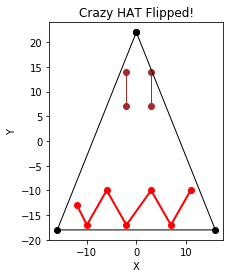

In [14]:
#Plotting the flipped image
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.array(d['mouth'])[:,0], np.array(d['mouth'])[:,1],  marker='o', c='red',linewidth=2)
ax.plot(np.array(d['leye'])[:,0], np.array(d['leye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(d['reye'])[:,0], np.array(d['reye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(d['outline'])[:,0], np.array(d['outline'])[:,1],  marker='o', c='black',linewidth=1)
ax.set_title('Crazy HAT Flipped!')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plt.show()


_I created a flip matrix and multiplied it with our matrix. The result of the flip can be seen in the above figure._

__Q 2.2 STRECH CRAZY HAT BY 2X TIMES__

In [15]:
#Creating a fresh matrix
d = copy.deepcopy(temp)
print(d)

{'leye': [[-3, 7], [-3, 14]], 'mouth': [[-11, -10], [-7, -17], [-3, -10], [2, -17], [6, -10], [10, -17], [12, -13]], 'outline': [[0, 22], [16, -18], [-16, -18], [0, 22]], 'reye': [[2, 7], [2, 14]]}


In [16]:
#Streching the matrix
#Strech matrix
S = np.array([[1,0],[0,2]])

for key in d:
    d[key] = np.array(d[key]) @ S
d

{'leye': array([[-3, 14],
        [-3, 28]]), 'mouth': array([[-11, -20],
        [ -7, -34],
        [ -3, -20],
        [  2, -34],
        [  6, -20],
        [ 10, -34],
        [ 12, -26]]), 'outline': array([[  0,  44],
        [ 16, -36],
        [-16, -36],
        [  0,  44]]), 'reye': array([[ 2, 14],
        [ 2, 28]])}

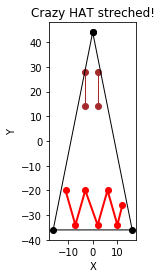

In [17]:
#Plotting the streched figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.array(d['mouth'])[:,0], np.array(d['mouth'])[:,1],  marker='o', c='red',linewidth=2)
ax.plot(np.array(d['leye'])[:,0], np.array(d['leye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(d['reye'])[:,0], np.array(d['reye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(d['outline'])[:,0], np.array(d['outline'])[:,1],  marker='o', c='black',linewidth=1)
ax.set_title('Crazy HAT streched!')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plt.show()

_I created a strech matrix and multiplied it with our matrix. The result of the strech can be seen in the above figure._

__Q 2.3 PERFORM A SET OF OPERATIONS__

In [18]:
#Creating a fresh matrix
d = copy.deepcopy(temp)
print(d)

{'leye': [[-3, 7], [-3, 14]], 'mouth': [[-11, -10], [-7, -17], [-3, -10], [2, -17], [6, -10], [10, -17], [12, -13]], 'outline': [[0, 22], [16, -18], [-16, -18], [0, 22]], 'reye': [[2, 7], [2, 14]]}


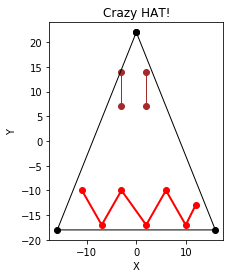

In [19]:
#Plotting the orginal matrix to see the difference
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.array(d['mouth'])[:,0], np.array(d['mouth'])[:,1],  marker='o', c='red',linewidth=2)
ax.plot(np.array(d['leye'])[:,0], np.array(d['leye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(d['reye'])[:,0], np.array(d['reye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(d['outline'])[:,0], np.array(d['outline'])[:,1],  marker='o', c='black',linewidth=1)
ax.set_title('Crazy HAT!')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plt.show()

In [20]:
#45 DEGREE ROTATION counterclockwise
R_45 = np.array([[cos_value(-45), -sin_value(-45)], [sin_value(-45), cos_value(-45)]])
R_45

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [21]:
#Multiplying our array with the 45 degree rotation counterclockwise
for key in d:
    d[key] = np.matmul(np.array(d[key]), R_45)
d

{'leye': array([[ -7.07106781,   2.82842712],
        [-12.02081528,   7.77817459]]),
 'mouth': array([[ -0.70710678, -14.8492424 ],
        [  7.07106781, -16.97056275],
        [  4.94974747,  -9.19238816],
        [ 13.43502884, -10.60660172],
        [ 11.3137085 ,  -2.82842712],
        [ 19.09188309,  -4.94974747],
        [ 17.67766953,  -0.70710678]]),
 'outline': array([[-15.55634919,  15.55634919],
        [ 24.04163056,  -1.41421356],
        [  1.41421356, -24.04163056],
        [-15.55634919,  15.55634919]]),
 'reye': array([[-3.53553391,  6.36396103],
        [-8.48528137, 11.3137085 ]])}

In [22]:
#FLipping the matrix
for key in d:
    d[key] = np.array(d[key]) @ F
d

{'leye': array([[ 7.07106781,  2.82842712],
        [12.02081528,  7.77817459]]),
 'mouth': array([[  0.70710678, -14.8492424 ],
        [ -7.07106781, -16.97056275],
        [ -4.94974747,  -9.19238816],
        [-13.43502884, -10.60660172],
        [-11.3137085 ,  -2.82842712],
        [-19.09188309,  -4.94974747],
        [-17.67766953,  -0.70710678]]),
 'outline': array([[ 15.55634919,  15.55634919],
        [-24.04163056,  -1.41421356],
        [ -1.41421356, -24.04163056],
        [ 15.55634919,  15.55634919]]),
 'reye': array([[ 3.53553391,  6.36396103],
        [ 8.48528137, 11.3137085 ]])}

In [23]:
#Streching the matrix
for key in d:
    d[key] = np.array(d[key]) @ S
d

{'leye': array([[ 7.07106781,  5.65685425],
        [12.02081528, 15.55634919]]),
 'mouth': array([[  0.70710678, -29.69848481],
        [ -7.07106781, -33.9411255 ],
        [ -4.94974747, -18.38477631],
        [-13.43502884, -21.21320344],
        [-11.3137085 ,  -5.65685425],
        [-19.09188309,  -9.89949494],
        [-17.67766953,  -1.41421356]]),
 'outline': array([[ 15.55634919,  31.11269837],
        [-24.04163056,  -2.82842712],
        [ -1.41421356, -48.08326112],
        [ 15.55634919,  31.11269837]]),
 'reye': array([[ 3.53553391, 12.72792206],
        [ 8.48528137, 22.627417  ]])}

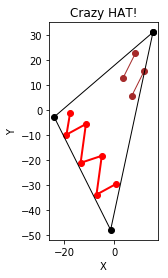

In [24]:
#Printing the image once to see if above operations are done okay
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.array(d['mouth'])[:,0], np.array(d['mouth'])[:,1],  marker='o', c='red',linewidth=2)
ax.plot(np.array(d['leye'])[:,0], np.array(d['leye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(d['reye'])[:,0], np.array(d['reye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(d['outline'])[:,0], np.array(d['outline'])[:,1],  marker='o', c='black',linewidth=1)
ax.set_title('Crazy HAT!')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plt.show()

In [25]:
#45 DEGREE ROTATION Again
R_45_2 = np.array([[cos_value(45), -sin_value(45)], [sin_value(45), cos_value(45)]])
R_45_2

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [26]:
#Multiplying it with 45 degrees
for key in d:
    d[key] = np.matmul(np.array(d[key]), R_45_2)
d

{'leye': array([[ 9. , -1. ],
        [19.5,  2.5]]), 'mouth': array([[-20.5, -21.5],
        [-29. , -19. ],
        [-16.5,  -9.5],
        [-24.5,  -5.5],
        [-12. ,   4. ],
        [-20.5,   6.5],
        [-13.5,  11.5]]), 'outline': array([[ 33.,  11.],
        [-19.,  15.],
        [-35., -33.],
        [ 33.,  11.]]), 'reye': array([[11.5,  6.5],
        [22. , 10. ]])}

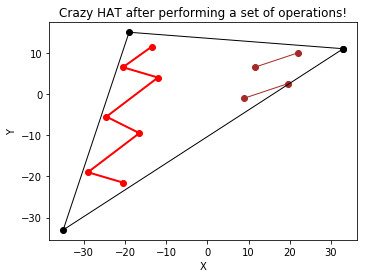

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.array(d['mouth'])[:,0], np.array(d['mouth'])[:,1],  marker='o', c='red',linewidth=2)
ax.plot(np.array(d['leye'])[:,0], np.array(d['leye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(d['reye'])[:,0], np.array(d['reye'])[:,1],  marker='o', c='brown',linewidth=1)
ax.plot(np.array(d['outline'])[:,0], np.array(d['outline'])[:,1],  marker='o', c='black',linewidth=1)
ax.set_title('Crazy HAT after performing a set of operations!')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plt.show()

_The result after performing a set of operations is displayed above. This was the result after performing the operations one after the other. Right now our transformation is (((H . R) . F) . S) . R2_

_In the next question we will be multiplying the operations together_

__Q 2.4 Consider all these transformations as a single linear transformation. Print the corresponding transition matrix.__

In [28]:
#Considering my original Hat matrix H
H = []
for name, group in grouped:
    for row_index, row in group.iterrows():
            H.append([row['x'], row['y']])

#Making it into a numpy array
H2 = np.array(H)
#print(H2)
print(H2.shape)

(15, 2)


In [29]:
#Flip matrix
F = np.array([[-1,0],[0,1]])

In [30]:
#Stretch matrix
S = np.array([[1,0],[0,2]])

In [31]:
print(H2.shape)
print(R_45.shape)
print(F.shape)
print(S.shape)
print(R_45_2.shape)

(15, 2)
(2, 2)
(2, 2)
(2, 2)
(2, 2)


In [32]:
#Final_transform = H @ (R @ F @ S @ R) - Linear transform
final_transform = H2@(R_45@F@S@R_45_2)

In [33]:
#final transformed matrix
final_transform

array([[  9. ,  -1. ],
       [ 19.5,   2.5],
       [-20.5, -21.5],
       [-29. , -19. ],
       [-16.5,  -9.5],
       [-24.5,  -5.5],
       [-12. ,   4. ],
       [-20.5,   6.5],
       [-13.5,  11.5],
       [ 33. ,  11. ],
       [-19. ,  15. ],
       [-35. , -33. ],
       [ 33. ,  11. ],
       [ 11.5,   6.5],
       [ 22. ,  10. ]])

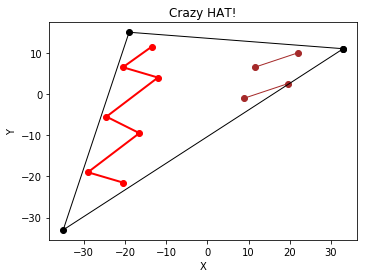

In [34]:
#Plotting the matrix
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(final_transform[:2][:,0], final_transform[:2][:,1],  marker='o', c='brown',linewidth=1)
ax.plot(final_transform[2:9][:,0], final_transform[2:9][:,1],  marker='o', c='red',linewidth=2)
ax.plot(final_transform[9:13][:,0], final_transform[9:13][:,1],  marker='o', c='black',linewidth=1)
ax.plot(final_transform[13:][:,0], final_transform[13:][:,1],  marker='o', c='brown',linewidth=1)
ax.set_title('Crazy HAT!')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plt.show()

_Now we performed all the operations together as a single linear transformation. Since matrices hold associative property, we are getting the same image as before:_

_Therefore, (((H . R) . F) . S) . R2 = H . (R . F . S . R2)_

# Q 3 Manipulate bitmap images

__Q 3.2 Read the image__

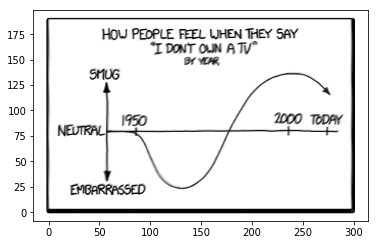

In [35]:
#Plotting the image in grey scale
#My computer took too long to get the full image, therefore I am using the small image.
from matplotlib.image import imread
img = imread('dont-own-tv-small.png')
R = img[:,:,1]
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

_Successfully read the image_

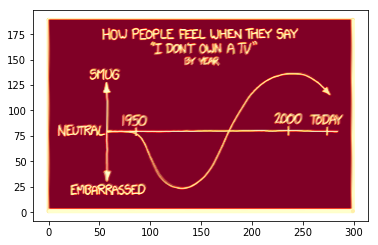

In [36]:
#Experimenting with colors
img = imread('dont-own-tv-small.png')
R = img[:,:,1]
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap=plt.cm.YlOrRd)
ax.set_aspect('equal')
plt.show()

__Q 3.3 Strech the image vertically so that it will be square-shaped__

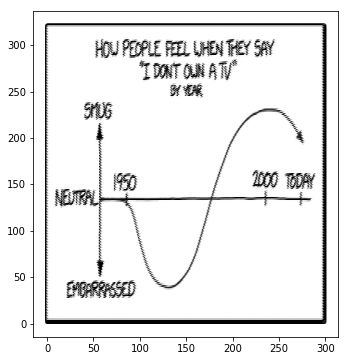

In [37]:
#Streching the image such that it becomes a big square matrix
img = imread('dont-own-tv-small.png')
R = img[:,:,1]
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
yy = yy*1.7
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap="Greys_r")
ax.set_aspect('equal')
plt.show()

_We can see that the image is streched into 300x300. It's now a square matrix._

__Q 3.4 Zoom into the arrowhead and rotate it__

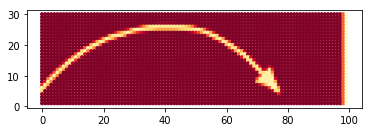

In [38]:
#Zooming in into the arrow
img = imread('dont-own-tv-small.png')
R = img[50:80,200:300,1]
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.',cmap=plt.cm.YlOrRd)
ax.set_aspect('equal')
plt.show()

_Successully zoomed into the arrow head._

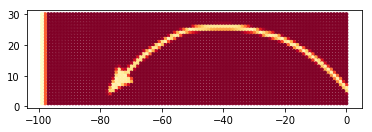

In [39]:
#Flipping the arrow to make it point to the left 
img = imread('dont-own-tv-small.png')
R = img[50:80,200:300,1]
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
xx = xx*-1
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap=plt.cm.YlOrRd)
ax.set_aspect('equal')
plt.show()

_Successully rotated the arrow head._

# EXTRA CREDIT

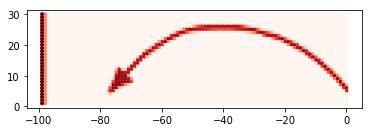

In [40]:
#Experimenting with Reds_r
img = imread('dont-own-tv-small.png')
R = img[50:80,200:300,1]
xx, yy = np.meshgrid(np.arange(R.shape[1]),
np.arange(R.shape[0], 0, -1))
xx = xx*-1
X = np.stack((xx.ravel(), yy.ravel()), axis=1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1], c=R.ravel(), marker='.', cmap='Reds_r')
ax.set_aspect('equal')
plt.show()

_The Reds__r in cmap gives a variation of red color in the image_